# Implementação de um modelo de Regressão Linear com regularização de Lasso(L2).
* Versão simples.

In [1]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Gerando dados artificiais:
np.random.seed(42)
X = np.random.rand(100, 5) # 100 amostras, 5 features
y = 3 * X[:,0] - 2 * X[:,1] + np.random.randn(100) * 0.1 # só X0 e X1 influenciam

# Separar treino e teste:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

# Criando e treinando o modelo Lasso: 
lasso = Lasso(alpha=0.1) # alpha é o parâmetro de regularização
lasso.fit(X_train, y_train)

# Fazendo previsões:
y_pred = lasso.predict(X_test)

# Avaliação do modelo:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred) 

print("Coeficientes:", lasso.coef_)
print("Intercepto:", lasso.intercept_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Coeficientes: [ 1.97057252 -1.02193377 -0.          0.         -0.        ]
Intercepto: 0.02721850496953948
MAE: 0.41
RMSE: 0.50
R²: 0.82


# Implementação de um modelo de Regressão Linear com regularização de Lasso(L2).
* Versão robusta.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

=== ANÁLISE EXPLORATÓRIA DOS DADOS ===
Shape: (500, 20)
Features verdadeiramente importantes: [ 0  2  5  8 11]
Número de features importantes: 5

Divisão: Treino 400 amostras, Teste 100 amostras

=== BUSCA DO MELHOR PARÂMETRO ALPHA ===
Melhor alpha (LassoCV): 0.022230
=== AVALIAÇÃO DO MODELO FINAL ===

TREINO:
  MAE:  0.38
  MSE:  0.24
  RMSE: 0.49
  R²:   0.99
  MAPE: 93.99%

TESTE:
  MAE:  0.39
  MSE:  0.24
  RMSE: 0.49
  R²:   0.99
  MAPE: 65.86%

=== ANÁLISE DE OVERFITTING ===
Diferença R² (Treino - Teste): -0.00
✅ Modelo generalizando bem!

=== ANÁLISE DOS COEFICIENTES LASSO ===
Intercepto: -0.04
Features selecionadas: 7/20

=== MÉTRICAS DE SELEÇÃO DE FEATURES ===
True Positives:  5
False Positives: 2
False Negatives: 0
Precisão: 71.4%
Recall:    100.0%


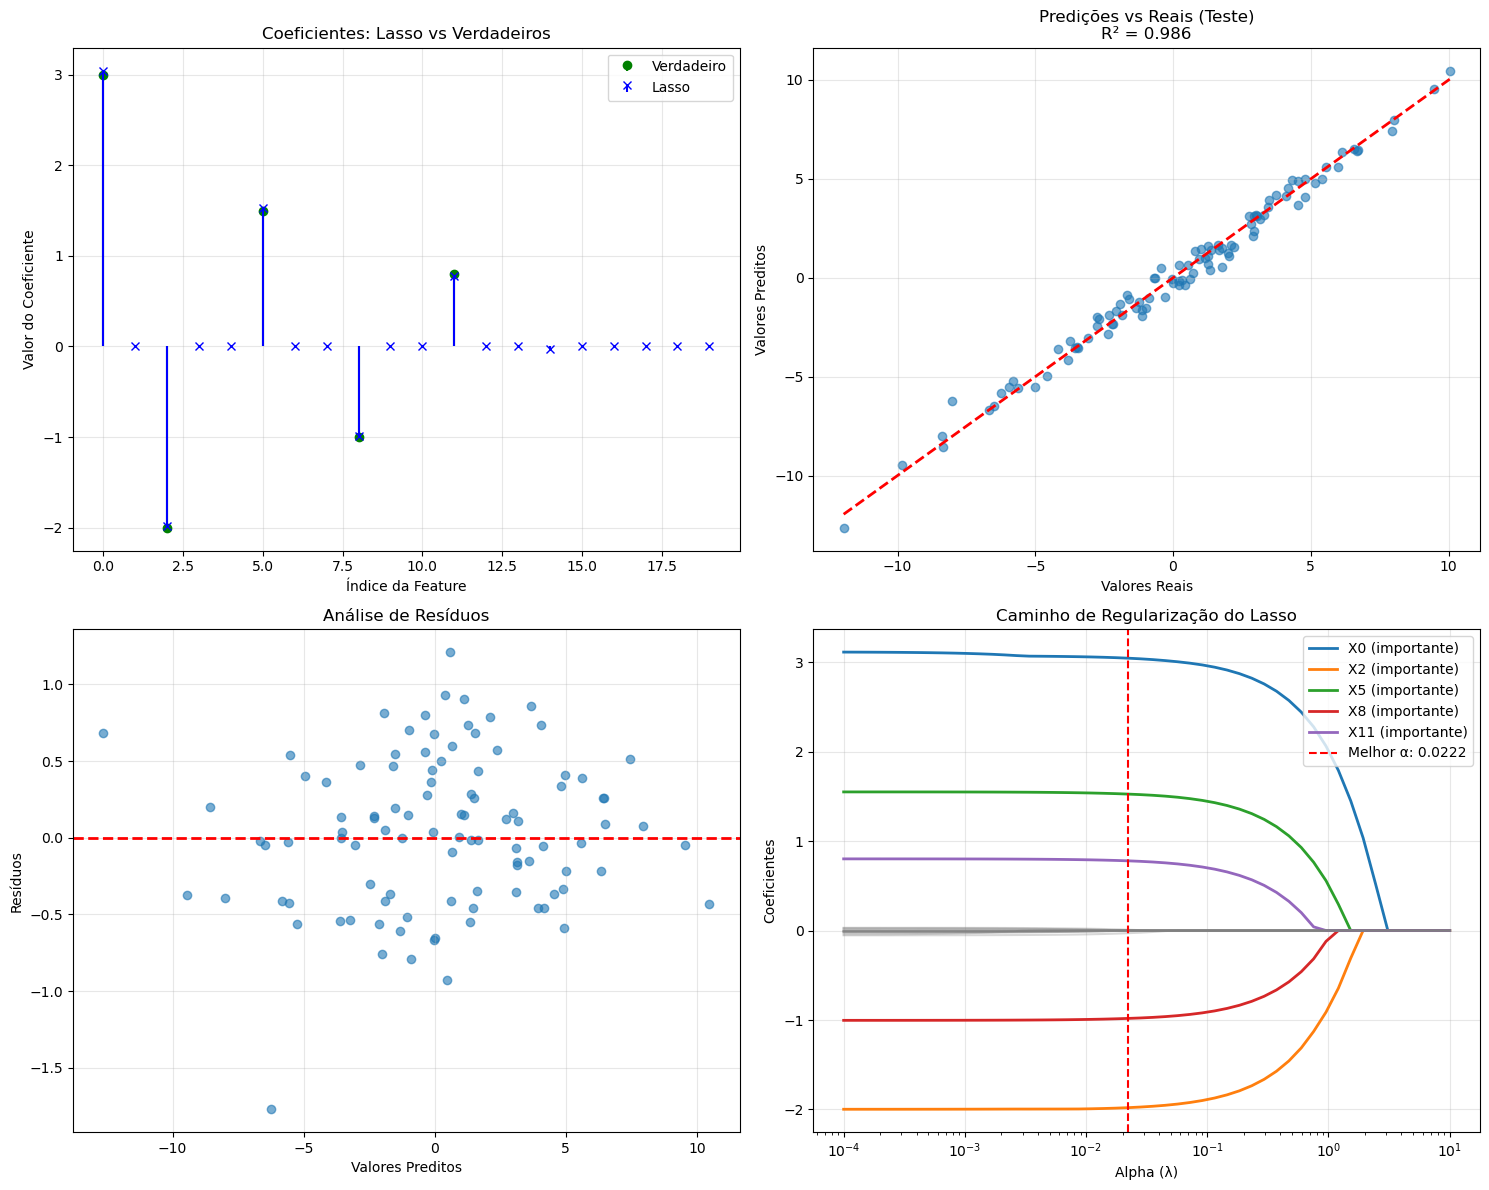


=== VALIDAÇÃO CRUZADA ADICIONAL ===
Scores CV: [0.98772987 0.98277349 0.98620259 0.97931659 0.98335546]
Média R² CV: 0.9839 (+/- 0.0058)

RESUMO EXECUTIVO DO MODELO LASSO
• Performance (Teste): R² = 0.986, RMSE = 0.494
• Features: 7 selecionadas de 20
• Seleção: 5 TP, 2 FP, 0 FN
• Overfitting: BAIXO
• Regularização: α = 0.022230


In [7]:
# 1. Dados mais realistas:

np.random.seed(42)
n_samples = 500 # Mais amostras para melhor generalização
n_features = 20 # Mais features para demonstrar seleção

# Criar dataset com:
# - 5 features importantes
# - 15 features irrelevantes (ruído)
# - Correlação entre algumas features

X = np.random.randn(n_samples, n_features)

# Introduzir correlação entre algumas features:
X[:, 1] = X[:, 0] * 0.7 + np.random.randn(n_samples) * 0.3 # X1 correlacionada com X0
X[:, 3] = X[:, 2] * 0.6 + np.random.randn(n_samples) * 0.4 # X3 correlacionada com X2

# Coeficientes verdadeiros (apenas 5 features são importantes):
true_beta = np.zeros(n_features)
true_beta[[0, 2, 5, 8, 11]] = [3.0, -2.0, 1.5, -1.0, 0.8]

y = X.dot(true_beta) + np.random.randn(n_samples) * 0.5

print("=== ANÁLISE EXPLORATÓRIA DOS DADOS ===")
print(f"Shape: {X.shape}")
print(f"Features verdadeiramente importantes: {np.where(true_beta != 0)[0]}")
print(f"Número de features importantes: {np.sum(true_beta != 0)}")

# 2. Divisão estratificada (se aplicável) ou com shuffle:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nDivisão: Treino {X_train.shape[0]} amostras, Teste {X_test.shape[0]} amostras")

# 3. Pipeline profissional com pré-processamento:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()), # CRUCIAL para Lasso
    ('lasso', Lasso(max_iter=10000, random_state=42))
])

# 4. Busca automática do melhor alpha (hiperparâmetro):
print("\n=== BUSCA DO MELHOR PARÂMETRO ALPHA ===")

# Método 1: LassoCV (mais eficiente):
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train, y_train)

print(f"Melhor alpha (LassoCV): {lasso_cv.alpha_:.6f}")

# Usar o melhor alpha encontrado:
best_alpha = lasso_cv.alpha_

# 5. Modelo final com o melhor alpha:
final_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=best_alpha, max_iter=10000, random_state=42))
])

final_lasso.fit(X_train, y_train)

# 6. Previsões e avaliação COMPLETA:
y_pred_train = final_lasso.predict(X_train)
y_pred_test = final_lasso.predict(X_test)

# Métricas detalhadas:
def avaliacao_abrangente(y_true, y_pred, set_name):
    """Avaliação completa do modelo"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{set_name}:")
    print(f"  MAE:  {mae:.2f}")
    print(f"  MSE:  {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.2f}")
    print(f"  MAPE: {mape:.2f}%")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'MAPE': mape}

print("=== AVALIAÇÃO DO MODELO FINAL ===")
metrics_train = avaliacao_abrangente(y_train, y_pred_train, "TREINO")
metrics_test = avaliacao_abrangente(y_test, y_pred_test, "TESTE")

# 7. Análise de overfitting:
overfit_gap = metrics_train["R²"] - metrics_test["R²"]
print(f"\n=== ANÁLISE DE OVERFITTING ===")
print(f"Diferença R² (Treino - Teste): {overfit_gap:.2f}")

if overfit_gap > 0.1:
    print("⚠️  ALERTA: Possível overfitting!")
elif overfit_gap < 0.05:
    print("✅ Modelo generalizando bem!")
else:
    print("📊 Modelo com generalização moderada")

# 8. Análise detalhada dos coeficientes:
lasso_model = final_lasso.named_steps['lasso']
coefficients = lasso_model.coef_

print(f"\n=== ANÁLISE DOS COEFICIENTES LASSO ===")
print(f"Intercepto: {lasso_model.intercept_:.2f}")
print(f"Features selecionadas: {np.sum(coefficients != 0)}/{n_features}")

# Tabela detalhada dos coeficientes:
coef_df = pd.DataFrame({
    'Feature': [f'X{i}' for i in range(n_features)],
    'Coeficiente_Lasso': coefficients,
    'Coeficiente_Verdadeiro': true_beta,
    'Selecionado': coefficients != 0,
    'Importante_Verdadeiro': true_beta != 0
})

# Análise de seleção de features:
true_positives = np.sum((coefficients != 0) & (true_beta != 0))
false_positives = np.sum((coefficients != 0) & (true_beta == 0))
false_negatives = np.sum((coefficients == 0) & (true_beta != 0))

print(f"\n=== MÉTRICAS DE SELEÇÃO DE FEATURES ===")
print(f"True Positives:  {true_positives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Precisão: {true_positives / (true_positives + false_positives):.1%}")
print(f"Recall:    {true_positives / (true_positives + false_negatives):.1%}")

# 9. Visualizações profissionais
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Coeficientes Lasso vs Verdadeiros
axes[0, 0].stem(np.where(true_beta != 0)[0], true_beta[true_beta != 0], 
                linefmt='g-', markerfmt='go', basefmt=" ", label='Verdadeiro')
axes[0, 0].stem(range(n_features), coefficients, 
                linefmt='b-', markerfmt='bx', basefmt=" ", label='Lasso')
axes[0, 0].set_xlabel('Índice da Feature')
axes[0, 0].set_ylabel('Valor do Coeficiente')
axes[0, 0].set_title('Coeficientes: Lasso vs Verdadeiros')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Predições vs Valores Reais
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.6)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0, 1].set_xlabel('Valores Reais')
axes[0, 1].set_ylabel('Valores Preditos')
axes[0, 1].set_title(f'Predições vs Reais (Teste)\nR² = {metrics_test["R²"]:.3f}')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Resíduos
residuals = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals, alpha=0.6)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valores Preditos')
axes[1, 0].set_ylabel('Resíduos')
axes[1, 0].set_title('Análise de Resíduos')
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 4: Caminho de Regularização
alphas = np.logspace(-4, 1, 50)
coef_paths = []

for alpha in alphas:
    temp_lasso = Lasso(alpha=alpha, max_iter=10000)
    temp_lasso.fit(StandardScaler().fit_transform(X_train), y_train)
    coef_paths.append(temp_lasso.coef_)

coef_paths = np.array(coef_paths)

for i in range(n_features):
    if true_beta[i] != 0:  # Destacar features importantes
        axes[1, 1].semilogx(alphas, coef_paths[:, i], linewidth=2, 
                           label=f'X{i} (importante)')
    else:
        axes[1, 1].semilogx(alphas, coef_paths[:, i], alpha=0.3, color='gray')

axes[1, 1].axvline(best_alpha, color='red', linestyle='--', 
                   label=f'Melhor α: {best_alpha:.4f}')
axes[1, 1].set_xlabel('Alpha (λ)')
axes[1, 1].set_ylabel('Coeficientes')
axes[1, 1].set_title('Caminho de Regularização do Lasso')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. Validação cruzada adicional
print("\n=== VALIDAÇÃO CRUZADA ADICIONAL ===")
cv_scores = cross_val_score(final_lasso, X_train, y_train, 
                           cv=5, scoring='r2')
print(f"Scores CV: {cv_scores}")
print(f"Média R² CV: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 11. Resumo executivo
print("\n" + "="*60)
print("RESUMO EXECUTIVO DO MODELO LASSO")
print("="*60)
print(f"• Performance (Teste): R² = {metrics_test['R²']:.3f}, RMSE = {metrics_test['RMSE']:.3f}")
print(f"• Features: {np.sum(coefficients != 0)} selecionadas de {n_features}")
print(f"• Seleção: {true_positives} TP, {false_positives} FP, {false_negatives} FN")
print(f"• Overfitting: {'BAIXO' if overfit_gap < 0.05 else 'MODERADO' if overfit_gap < 0.1 else 'ALTO'}")
print(f"• Regularização: α = {best_alpha:.6f}")
print("="*60)